# Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import csv
import seaborn as sn


# For load file "weather.csv" into Jupyter Notebook Colab  
(not needed if not using Colab)

In [2]:
from google.colab import files
uploaded = files.upload()
! ls

Saving weather.csv to weather.csv
sample_data  weather.csv


# Load the data 




In [3]:
df = pd.read_csv("weather.csv") 

In [ ]:
df.head()

,YEAR,MONTH,DAY,WS_1_MAX_T,WS_1_MIN_T,WS_1_MEAN_T,WS_1_MAX_H,WS_1_MIN_H,WS_1_MEAN_H,WS_1_MAX_P,...,WS_124_MAX_T,WS_124_MIN_T,WS_124_MEAN_T,WS_124_MAX_H,WS_124_MIN_H,WS_124_MEAN_H,WS_124_MAX_P,WS_124_MIN_P,WS_124_MEAN_P,WS_124_RAIN
0,2022,1,1,13.3,2.7,7.4,91.0,57.0,80.5,1027.3,...,14.2,11.6,12.5,91.0,81.0,87.4,1028.0,1025.9,1026.9,0.0
1,2022,1,2,10.6,1.3,5.4,94.0,67.0,85.8,1027.4,...,13.3,11.4,12.2,84.0,74.0,81.1,1028.0,1023.5,1026.0,0.0
2,2022,1,3,8.9,1.9,5.9,92.0,78.0,84.8,1023.1,...,15.8,10.2,12.6,90.0,66.0,79.3,1023.5,1016.0,1019.3,0.0
3,2022,1,4,7.2,4.6,6.3,94.0,88.0,92.6,1023.1,...,14.4,9.7,12.2,91.0,74.0,86.0,1016.0,1006.3,1010.8,0.4
4,2022,1,5,10.0,3.8,7.3,95.0,52.0,87.3,1006.9,...,14.4,10.8,13.0,94.0,22.0,78.3,1006.3,997.1,1000.4,3.8


The first three columns corresponds to the year, month and day in which the observations took place.

The remaining columns are organized in (49) groups of 10 columns each:

Each group represent a set of atmospheric observations collected at a given weather station in a given day. The following observations are reported (in order):
- Maximum Temperature (°C)
- Minimum Temperature (°C)
- Mean Temperature (°C)
- Maximum Relative Humidity (%)
- Minimum Relative Humidity (%)
- Mean Relative Humidity (%)
- Maximum Pressure (hPa)
- Minimum Pressure (hPa)
- Mean Pressure (hPa)
- Rainfall (mm)

# Perform 1

Calculate the minimum, maximum and average rainfall and standard deviation of the rainfall over all the stations and all the days (a single set of numbers for the entire dataset).

In [ ]:
#Prepare the dataset

d = (len(df.columns))
print(d)
print(df.iloc[:,12:d:10])  # jump the first 3 + 9 colunm, and step of 10 up to end  

493
     WS_1_RAIN  WS_130_RAIN  WS_5_RAIN  WS_10_RAIN  WS_140_RAIN  WS_142_RAIN  \
0          0.2          0.0        0.0         0.0          0.0          0.2   
1          0.4          0.0        0.0         0.0          0.0          0.2   
2          0.0          0.0        0.0         0.0          0.0          0.2   
3          1.0          0.4        0.0         1.2          0.0          3.3   
4          0.8          0.0        0.4         0.6          0.0          1.3   
..         ...          ...        ...         ...          ...          ...   
146        0.0          0.2        0.0         8.0          1.0          0.0   
147        0.2          0.0        0.4         0.2         10.8         14.0   
148        0.0          0.0        0.0         0.0          5.0          0.2   
149        0.0          0.0        0.0         0.0          0.2          0.0   
150        0.0          0.0        0.0         0.0          0.2          0.0   

     WS_143_RAIN  WS_145_RAIN  WS_2

In [ ]:
f = df.iloc[:,12:d:10]

mn = f.min(axis=1)
print("Total min : ",mn.min().round(2) )

mx = f.max(axis=1)
print("Total max : ",mx.max().round(2) )

m1 = f.mean(axis=1)
print("Total mean : ",m1.mean().round(2) )

s1 = f.std(axis=1)
print("Standard deviation : ",s1.mean().round(2) )

Total min :  0.0
Total max :  110.8
Total mean :  1.23
Standard deviation :  1.75


# Perform 2

Calculate the minimum, maximum and average rainfall and standard deviation of the rainfall at each station over all the days (a different set of numbers for each station).

In [ ]:
f = df.iloc[:,12:d:10]

print(f'{f.describe()}') # stat for each column

        WS_1_RAIN  WS_130_RAIN   WS_5_RAIN  WS_10_RAIN  WS_140_RAIN  \
count  151.000000   151.000000  151.000000  151.000000   151.000000   
mean     0.634437     0.431788    1.364238    0.887417     2.141722   
std      2.031454     1.378713    4.818193    2.827727     7.775709   
min      0.000000     0.000000    0.000000    0.000000     0.000000   
25%      0.000000     0.000000    0.000000    0.000000     0.000000   
50%      0.000000     0.000000    0.000000    0.000000     0.000000   
75%      0.000000     0.000000    0.000000    0.000000     0.200000   
max     13.400000     9.000000   28.800000   19.000000    79.200000   

       WS_142_RAIN  WS_143_RAIN  WS_145_RAIN  WS_21_RAIN  WS_22_RAIN  ...  \
count   151.000000   151.000000   151.000000  151.000000  151.000000  ...   
mean      1.029139     0.776159     0.601325    1.280795    0.530464  ...   
std       3.497496     2.805797     2.625871    3.831322    2.647137  ...   
min       0.000000     0.000000     0.000000    0.00

In [ ]:
f = df.iloc[:,12:d:10]

# similar perform 
print(f'{f.min() = }')
print(f'{f.max() = }')
print(f'{f.mean() = }')
print(f'{f.std() = }')

# Perform 3

Calculate the minimum, maximum and average rainfall and standard deviation of the rainfall across all stations at each day (a different set of numbers for each day).

In [ ]:
f = df.iloc[:,12:d:10]

f.apply(pd.DataFrame.describe, axis=1)  # stat for each day (row)

,count,mean,std,min,25%,50%,75%,max
0,49.0,0.071429,0.168325,0.0,0.0,0.0,0.0,1.0
1,49.0,0.069388,0.154386,0.0,0.0,0.0,0.0,0.8
2,49.0,0.057143,0.106066,0.0,0.0,0.0,0.0,0.4
3,49.0,0.934694,2.157019,0.0,0.0,0.0,0.8,12.8
4,49.0,1.883673,4.117865,0.0,0.2,0.6,2.2,26.8
...,...,...,...,...,...,...,...,...
146,49.0,0.322449,1.263472,0.0,0.0,0.0,0.0,8.0
147,49.0,3.473469,5.925678,0.0,0.0,0.2,3.3,22.9
148,49.0,3.010204,5.919714,0.0,0.0,0.2,2.7,25.8
149,49.0,0.151020,0.553068,0.0,0.0,0.0,0.0,3.2


# Perform 4

Find the station that registered the highest temperature on each day (a station id for each day).

In [ ]:
#Prepare the dataset
d = (len(df.columns))
print(df.iloc[:,3:d:10]) 


In [ ]:
ft = df.iloc[:,3:d:10]

print(ft.max(axis=1))  #  Max value for each day (row)

0      20.0
1      19.8
2      16.2
3      14.4
4      14.8
       ... 
146    34.0
147    33.3
148    32.9
149    23.3
150    23.3
Length: 151, dtype: float64


In [ ]:
maxValueIndex = ft.idxmax(axis=1)
print("Row    Max is in column")
print(maxValueIndex)           # Max value of row ... is at columns ...

Row    Max is in column
0      WS_156_MAX_T
1      WS_163_MAX_T
2      WS_205_MAX_T
3      WS_124_MAX_T
4       WS_92_MAX_T
           ...     
146     WS_92_MAX_T
147    WS_111_MAX_T
148     WS_28_MAX_T
149    WS_124_MAX_T
150    WS_124_MAX_T
Length: 151, dtype: object


# Perform 5

Find the day in which the lowest temperature has been recorded.

In [ ]:
#Prepare the dataset
d = (len(df.columns))
print(df.iloc[:,4:d:10]) 

In [6]:
fmt = df.iloc[:,4:d:10] 
print("Value of lowest temperature has been recorded: ", fmt.min().min())
mc = fmt.min().min()

reID = [col for col in fmt if (fmt[col] == mc).any()]
print("ID station : ", reID[0])

r = fmt.index[fmt[reID[0]]==mc].tolist()
print("Row :   ", r[0])
print( "  Equivalent Day : ", df.iloc[r[0],2],  ", Month : ", df.iloc[r[0],1])

#More:
#minv = fmt.idxmin()
#print("Min values of columns are at row index position :")
#print(minv)

#print("lowest temperature for columns:")
#print(fmt.min())

Value of lowest temperature has been recorded:  -20.7
ID station :  WS_154_MIN_T
Row :    10
  Equivalent Day :  11 , Month :  1


# Perform 6
Find the average relative humidity recorded in February for each station.

In [ ]:
#Prepare dataset

February = df["MONTH"] == 2
feb = df.loc[February]
feb.head()

,YEAR,MONTH,DAY,WS_1_MAX_T,WS_1_MIN_T,WS_1_MEAN_T,WS_1_MAX_H,WS_1_MIN_H,WS_1_MEAN_H,WS_1_MAX_P,...,WS_124_MAX_T,WS_124_MIN_T,WS_124_MEAN_T,WS_124_MAX_H,WS_124_MIN_H,WS_124_MEAN_H,WS_124_MAX_P,WS_124_MIN_P,WS_124_MEAN_P,WS_124_RAIN
31,2022,2,1,12.2,1.7,7.7,58.0,23.0,38.7,1017.9,...,15.5,6.2,10.3,73.0,21.0,45.5,1015.1,1010.1,1013.6,0.0
32,2022,2,2,17.2,2.9,9.5,61.0,31.0,48.6,1018.7,...,18.6,5.7,11.0,73.0,34.0,59.6,1017.5,1011.2,1013.3,0.0
33,2022,2,3,12.8,5.1,8.8,80.0,54.0,65.7,1022.2,...,15.9,8.5,11.8,89.0,56.0,72.5,1022.3,1017.3,1020.2,0.0
34,2022,2,4,12.2,3.7,7.7,86.0,52.0,74.1,1021.0,...,12.5,10.3,11.4,94.0,80.0,87.7,1020.1,1015.8,1017.3,1.2
35,2022,2,5,12.2,2.4,7.2,90.0,60.0,76.0,1024.7,...,16.8,8.2,11.3,88.0,57.0,78.5,1023.2,1016.1,1018.7,0.0


In [ ]:
hum = (feb.iloc[:,8:d:10]) 
#print(feb.iloc[:,8:d:10]) 

print("Humidity recorded in February for each station:\n")
print(hum.mean())

Humidity recorded in February for each station:

WS_1_MEAN_H      61.482143
WS_130_MEAN_H    74.271429
WS_5_MEAN_H      57.150000
WS_10_MEAN_H     59.760714
WS_140_MEAN_H    60.271429
WS_142_MEAN_H    72.521429
WS_143_MEAN_H    75.457143
WS_145_MEAN_H    47.664286
WS_21_MEAN_H     60.010714
WS_22_MEAN_H     28.582143
WS_151_MEAN_H    75.735714
WS_24_MEAN_H     56.771429
WS_152_MEAN_H    61.307143
WS_154_MEAN_H    73.164286
WS_28_MEAN_H     70.167857
WS_29_MEAN_H     57.039286
WS_156_MEAN_H    48.500000
WS_158_MEAN_H    65.903571
WS_159_MEAN_H    48.017857
WS_161_MEAN_H    52.607143
WS_163_MEAN_H    53.853571
WS_37_MEAN_H     55.164286
WS_42_MEAN_H     68.425000
WS_43_MEAN_H     52.314286
WS_170_MEAN_H    62.117857
WS_172_MEAN_H    70.350000
WS_174_MEAN_H    75.428571
WS_176_MEAN_H    53.632143
WS_179_MEAN_H    62.092857
WS_187_MEAN_H    57.775000
WS_191_MEAN_H    64.642857
WS_192_MEAN_H    47.400000
WS_65_MEAN_H     72.907143
WS_193_MEAN_H    56.707143
WS_67_MEAN_H     69.571429
WS_194

# Perform 7
Calculate the average relative humidity for each month in the dataset.

In [ ]:
#Prepare dataset
grouped = df.groupby(df.MONTH)

df_gen = grouped.get_group(1)
df_feb = grouped.get_group(2)
df_mar = grouped.get_group(3)
df_apr = grouped.get_group(4)
df_mag = grouped.get_group(5)

df_mag.tail()

,YEAR,MONTH,DAY,WS_1_MAX_T,WS_1_MIN_T,WS_1_MEAN_T,WS_1_MAX_H,WS_1_MIN_H,WS_1_MEAN_H,WS_1_MAX_P,...,WS_124_MAX_T,WS_124_MIN_T,WS_124_MEAN_T,WS_124_MAX_H,WS_124_MIN_H,WS_124_MEAN_H,WS_124_MAX_P,WS_124_MIN_P,WS_124_MEAN_P,WS_124_RAIN
146,2022,5,27,31.1,18.1,24.8,84.0,36.0,63.3,1020.2,...,33.1,23.8,28.3,55.0,27.0,41.9,1017.4,1010.7,1014.2,0.0
147,2022,5,28,30.6,17.4,24.9,86.0,35.0,55.9,1011.7,...,30.2,20.3,24.8,75.0,37.0,55.8,1010.8,1001.4,1005.7,0.0
148,2022,5,29,18.9,13.2,16.7,86.0,59.0,70.3,1008.8,...,24.7,18.8,21.5,81.0,53.0,68.9,1005.5,1002.0,1003.1,0.0
149,2022,5,30,19.4,14.2,17.1,79.0,56.0,69.0,1013.4,...,23.3,16.8,20.1,81.0,58.0,68.3,1012.0,1005.1,1007.9,0.0
150,2022,5,31,19.4,14.2,17.1,79.0,56.0,69.0,1013.4,...,23.3,16.8,20.1,81.0,58.0,68.3,1012.0,1005.1,1007.9,0.0


In [ ]:
df_gen = df_gen.iloc[:,8:d:10]   #only humudity column
df_feb = df_feb.iloc[:,8:d:10]   
df_mar = df_mar.iloc[:,8:d:10]   
df_apr = df_apr.iloc[:,8:d:10]   
df_mag = df_mag.iloc[:,8:d:10]   

In [ ]:
print("Average humidity for Jan   month : ", df_gen.mean().mean().round(3))
print("Average humidity for Feb month   : ", df_feb.mean().mean().round(3))
print("Average humidity for March month : ", df_mar.mean().mean().round(3))
print("Average humidity for April month : ", df_apr.mean().mean().round(3))
print("Average humidity for May month   : ", df_mag.mean().mean().round(3))

Average humidity for Jan   month :  63.954
Average humidity for Feb month   :  60.477
Average humidity for March month :  58.274
Average humidity for April month :  64.35
Average humidity for May month   :  70.956


# Perform 8
Compute the monthly average of daily temperature ranges across all stations. Visualize them as a bar plot.


In [ ]:
#Prepare dataset
grouped = df.groupby(df.MONTH)

df_gen = grouped.get_group(1)
df_feb = grouped.get_group(2)
df_mar = grouped.get_group(3)
df_apr = grouped.get_group(4)
df_mag = grouped.get_group(5)


df_gen = df_gen.iloc[:,5:d:10]   #only Temp mean column
df_feb = df_feb.iloc[:,5:d:10]   
df_mar = df_mar.iloc[:,5:d:10]   
df_apr = df_apr.iloc[:,5:d:10]   
df_mag = df_mag.iloc[:,5:d:10] 
df_mag.tail()

,WS_1_MEAN_T,WS_130_MEAN_T,WS_5_MEAN_T,WS_10_MEAN_T,WS_140_MEAN_T,WS_142_MEAN_T,WS_143_MEAN_T,WS_145_MEAN_T,WS_21_MEAN_T,WS_22_MEAN_T,...,WS_72_MEAN_T,WS_202_MEAN_T,WS_204_MEAN_T,WS_205_MEAN_T,WS_85_MEAN_T,WS_86_MEAN_T,WS_92_MEAN_T,WS_108_MEAN_T,WS_111_MEAN_T,WS_124_MEAN_T
146,24.8,8.7,24.3,23.9,16.2,24.6,25.3,14.2,19.8,24.6,...,19.2,18.1,18.9,23.4,23.3,22.9,27.6,23.0,23.0,28.3
147,24.9,7.0,24.3,25.5,16.0,24.0,24.9,13.7,18.9,26.9,...,18.8,18.9,19.3,25.5,22.9,22.6,24.2,24.9,23.6,24.8
148,16.7,3.1,15.6,15.0,6.9,15.5,16.3,9.4,16.4,16.5,...,12.5,15.5,10.5,15.5,15.7,14.6,18.4,16.6,15.6,21.5
149,17.1,3.7,15.8,15.6,6.4,16.0,17.3,7.3,15.7,15.0,...,12.0,16.2,10.7,14.2,14.3,14.7,19.0,15.2,16.5,20.1
150,17.1,3.7,15.8,15.6,6.4,16.0,17.3,7.3,15.7,15.0,...,12.0,16.2,10.7,14.2,14.3,14.7,19.0,15.2,16.5,20.1


In [ ]:
print("Monthly average of daily temperature ranges across all stations.")
print("\nTemp for Jan:\n",df_gen.mean(axis=1).round(2))
print("\nTemp for Feb:\n",df_feb.mean(axis=1).round(2))
print("\nTemp for March:\n",df_mar.mean(axis=1).round(2))
print("\nTemp for April:\n ",df_apr.mean(axis=1).round(2))
print("\nTemp for May:\n", df_mag.mean(axis=1).round(2))

Text(0, 0.5, 'Average Temperature')

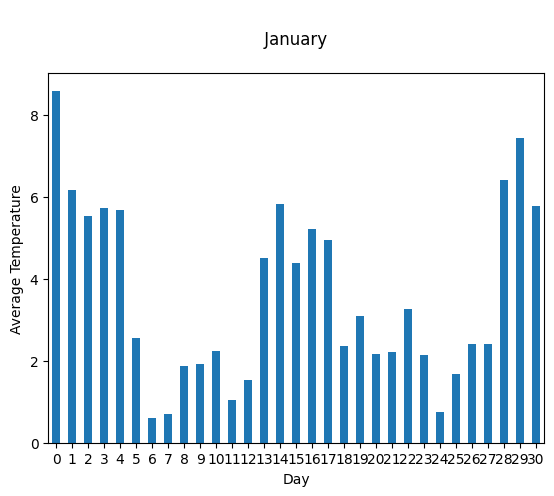

In [ ]:
ax = df_gen.mean(axis=1).round(2).plot.bar(x='', y='', rot=0, title= "\n January \n")
ax.set_xlabel("Day")
ax.set_ylabel("Average Temperature")

Text(0, 0.5, 'Average Temperature')

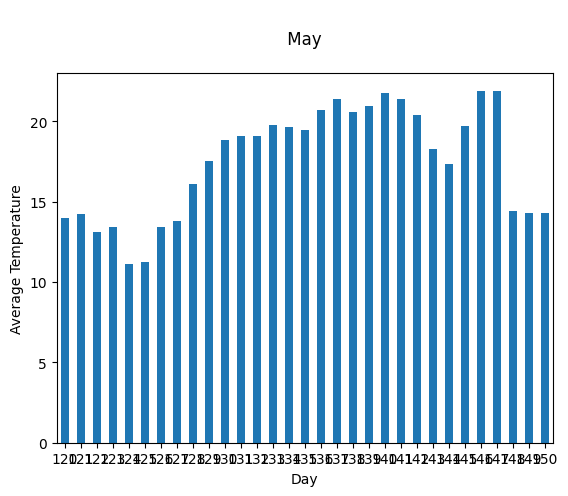

In [ ]:
ax = df_mag.mean(axis=1).round(2).plot.bar(x='', y='', rot=0, title= "\n May \n")
ax.set_xlabel("Day")
ax.set_ylabel("Average Temperature")

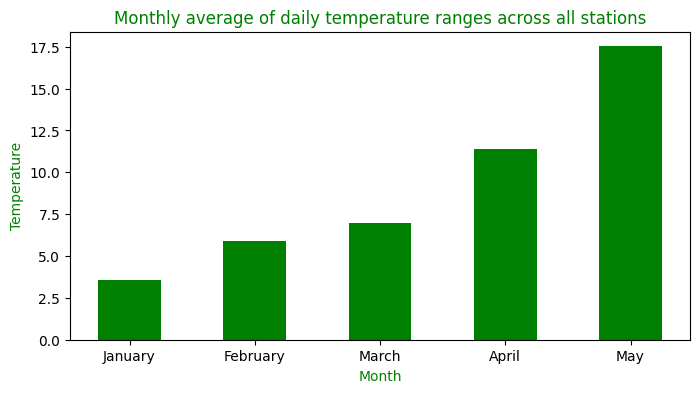

In [ ]:
fig = plt.figure(figsize = (8, 4))
mon = ["January", "February", "March", "April", "May"]
val = [df_gen.mean(axis=1).round(2).mean(),
       df_feb.mean(axis=1).round(2).mean(),
       df_mar.mean(axis=1).round(2).mean(),
       df_apr.mean(axis=1).round(2).mean(),
       df_mag.mean(axis=1).round(2).mean()]

# creating the bar plot
plt.bar(mon, val, color ='green', width = 0.5)
 
plt.xlabel("Month",color ='green')
plt.ylabel("Temperature",color ='green')
plt.title("Monthly average of daily temperature ranges across all stations",color ='green')
plt.show()
